## Assignment 7: Neural Networks using Keras and Tensorflow

Please see the associated document for questions

|  <font size=4>Name</font>  | <font size=4>Working Hours</font>   |
|  :----  | :----  |
| <font size=4>Dimitrios Koutsakis</font>   | <font size=4>8</font> |
| <font size=4>Bingcheng Chen</font>  | <font size=4>8</font> |

If you have problems with Keras and Tensorflow on your local installation please make sure they are updated. On Google Colab this notebook runs.

In [ ]:
# pip install tensorflow

In [1]:
# imports
from __future__ import print_function
import keras
from keras import utils as np_utils
from keras.utils import to_categorical
import tensorflow
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import tensorflow as tf
from matplotlib import pyplot as plt

In [2]:
# Hyper-parameters data-loading and formatting

batch_size = 128
num_classes = 10
epochs = 10

img_rows, img_cols = 28, 28

# Load MNIST handwritten digit data
(x_train, lbl_train), (x_test, lbl_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert lbl_train.shape == (60000,)
assert lbl_test.shape == (10000,)

# 'channels_first' means that the color channels of an image tensor are the first dimension in the tensor, followed by the spatial dimensions (height and width). An image tensor would have shape (samples, channels, height, width).
# 'channels_last' means that the color channels of an image tensor are the last dimension in the tensor, after the spatial dimensions. In the channels_last format, an image tensor would have shape (samples, height, width, channels).
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

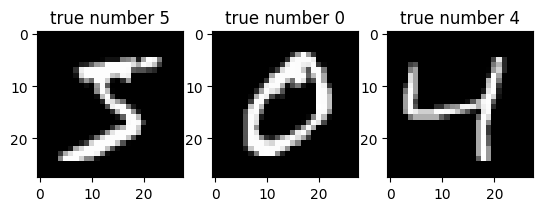

In [10]:
# plot first few images in x_train dataset
for i in range(3):
    plt.subplot(1,3,i+1)
    # plot raw pixel data
    plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
    plt.title('true number {}'.format(lbl_train[i]))
# show the figure
plt.show()

#### **1. Preprocessing**

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(lbl_train, num_classes)
y_test = keras.utils.to_categorical(lbl_test, num_classes)


##### **Q1.1** Explain the data pre-processing highlighted in the notebook.

#### **2. Network model, training, and changing hyper-parameters**

In [ ]:
## Define model ##
model = Sequential()

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
               optimizer=tensorflow.keras.optimizers.SGD(learning_rate = 0.1),
        metrics=['accuracy'],)

fit_info = model.fit(x_train, y_train,
           batch_size=batch_size,
           epochs=epochs,
           verbose=1,
           validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}, Test accuracy {}'.format(score[0], score[1]))

##### **Q2.1** How many layers does the network in the notebook have? How many neurons does each layer have? What activation functions and why are these appropriate for this ap- plication? What is the total number of parameters for the network? Why do the input and output layers have the dimensions they have?

##### **Q2.2** What loss function is used to train the network? What is the functional form (a math- ematical expression) of the loss function? and how should we interpret it? Why is it appropriate for the problem at hand?

##### **Q2.3** Train the network for 10 epochs and plot the training and validation accuracy for each epoch.

##### **Q2.4** Update the model to implement a three-layer neural network where the hidden layers have 500 and 300 hidden units respectively. Train for 40 epochs. What is the best vali- dation accuracy you can achieve? Geoff Hinton (a co-pioneer of Deep learning) claimed this network could reach a validation accuracy of 0.9847 (http://yann.lecun.com/exdb/mnist/) using weight decay (L2 regularization of weights(kernels): https://keras.io/api/layers/regularizers/). Implement weight decay on hidden units and train and select 5 regularization factors from 0.000001 to 0.001. Train 3 replicates networks for each regularization factor. Plot the final validation accuracy with standard deviation (computed from the replicates) as a function of the regularization factor. How close do you get to Hintons result? – If you do not get the same results, what factors may influence this? (hint: What information is not given by Hinton on the MNIST database that may influence Model training)

#### **3. Convolutional layers**

##### **Q3.1** Design a model that makes use of at least one convolutional layer – how performant a model can you get? -- According to the MNIST database it should be possible reach to 99% accuracy on the validation data. If you choose to use any layers apart from the convolutional layers and layers that you used in previous questions, you must describe what they do. If you do not reach 99% accuracy, report your best performance, and explain your attempts and thought process.

##### **Q3.2** Discuss the differences and potential benefits of using convolutional layers over fully connected ones for the application?